In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
from pingouin import mwu

df = pd.read_excel('datos_features.xlsx')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Divide data

In [2]:
variable = df['is_humor']
h = df[(df['is_humor'] == 1)]
nh = df[(df['is_humor'] == 0)]

h['label'] = 'Humour'
nh['label'] = 'No Humour'

<ipython-input-2-761c8e2f2768>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['label'] = 'Humour'
<ipython-input-2-761c8e2f2768>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nh['label'] = 'No Humour'


In [3]:
# determine the quartile values to use with pd.cut
quartiles = h['offense_rating'].quantile([.25, .5, .75]).tolist()

In [4]:
quartiles = [0] + quartiles + [float('inf')]
quartiles

[0, 0.0, 0.35, 1.45, inf]

In [3]:
#divide data in non offense and high offense
lowOffense1 = h.loc[h['offense_rating'] <= 0]
highOffense = h.loc[(h['offense_rating'] > 1.45)]

lowOffense1['tag'] = 'low_offense1'
highOffense['tag'] = 'high_offense'

<ipython-input-3-7da7fe028203>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowOffense1['tag'] = 'low_offense1'
<ipython-input-3-7da7fe028203>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highOffense['tag'] = 'high_offense'


### Offence rating stats

In [92]:
######## genero el label y lo guardo en otro excel
Offense1 = df.loc[(df['offense_rating'] <= 0)]
Offense2 = df.loc[(df['offense_rating'] > 0) & (df['offense_rating'] <= 0.35)]
Offense3 = df.loc[(df['offense_rating'] > 0.35) & (df['offense_rating'] <= 1.45)]
highOff = df.loc[(df['offense_rating'] > 1.45)]

#Offense1['offenseRatingTag'] = 'No offense'
#Offense2['offenseRatingTag'] = 2 #'Low offense'
#Offense3['offenseRatingTag'] = 1 #'Medium offense'
#highOff['offenseRatingTag'] = 'High offense'
#total = pd.concat([Offense1,highOff])
#df.to_excel('/Users/luciainesmerlo/Desktop/TFG/HaHackaton2020/LABELEDdatos_features.xlsx')
print(Offense1.shape,Offense2.shape[0]+Offense3.shape[0]+highOff.shape[0])

(3388, 160) 4612


In [7]:
print(lowOffense1.shape, lowOffense1["offense_rating"].mean(),lowOffense1["offense_rating"].std(),
     lowOffense1["offense_rating"].mean()-lowOffense1["offense_rating"].std(),
     lowOffense1["offense_rating"].mean()+lowOffense1["offense_rating"].std())

(1253, 162) 0.0 0.0 0.0 0.0


In [8]:
print(lowOffense2.shape, lowOffense2["offense_rating"].mean(),lowOffense2["offense_rating"].std(),
     lowOffense2["offense_rating"].mean()-lowOffense2["offense_rating"].std(),
     lowOffense2["offense_rating"].mean()+lowOffense2["offense_rating"].std())

(1264, 161) 0.17741297468354458 0.09619704814712911 0.08121592653641548 0.2736100228306737


In [9]:
print(lowOffense3.shape, lowOffense3["offense_rating"].mean(),lowOffense3["offense_rating"].std(),
     lowOffense3["offense_rating"].mean()-lowOffense3["offense_rating"].std(),
     lowOffense3["offense_rating"].mean()+lowOffense3["offense_rating"].std())

(1205, 161) 0.8461825726141077 0.3221700710485405 0.5240125015655672 1.1683526436626481


In [10]:
print(highOffense.shape, highOffense["offense_rating"].mean(),highOffense["offense_rating"].std(),
     highOffense["offense_rating"].mean()-highOffense["offense_rating"].std(),
     highOffense["offense_rating"].mean()+highOffense["offense_rating"].std())

(1210, 162) 2.6352066115702457 0.8284340007431792 1.8067726108270665 3.4636406123134247


In [4]:
lowOffense1 = lowOffense1.sample(n=1210,random_state=1)
highOffense = highOffense.sample(n=1210, random_state=1)

t = pd.concat([lowOffense1,highOffense])

In [24]:
t["offenseRatingTag"].unique()

array([1, 2, 4, 3])

## Distributions

### Offense rating distribution if it belongs to humor or no humor

[Text(0.5, 1.0, 'No humour')]

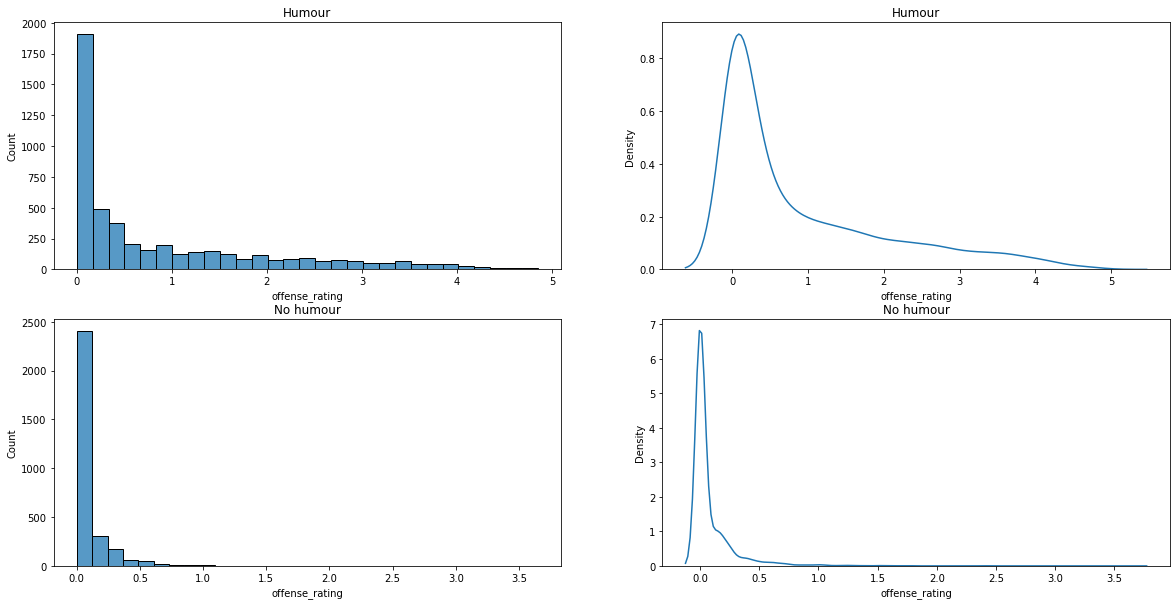

In [12]:
_, axes = plt.subplots(nrows=2, ncols=2 , figsize=(20, 10))
sns.histplot(h['offense_rating'],ax=axes[0,0]).set(title='Humour')
sns.kdeplot(data=h, x="offense_rating",ax=axes[0,1]).set(title='Humour')
sns.histplot(nh['offense_rating'],ax=axes[1,0],bins=30).set(title='No humour')
sns.kdeplot(data=nh, x="offense_rating",ax=axes[1,1]).set(title='No humour')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

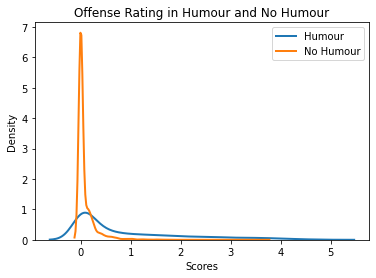

In [19]:
lista = ['Humour', 'No Humour']

for l in lista:
    
    if l == 'Humour':
        sns.distplot(h['offense_rating'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'Humour')
    else:
        sns.distplot(nh['offense_rating'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'No Humour')
    
plt.legend(prop={'size': 10})
plt.title('Offense Rating in Humour and No Humour')
plt.xlabel('Scores')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

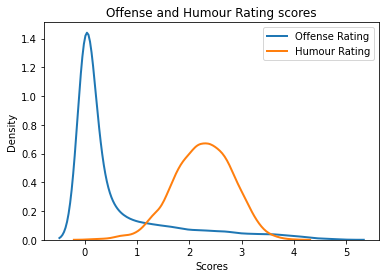

In [6]:
lista = ['offense_rating', 'humor_rating']

for l in lista:
    
#    subset = df[df['label'] == l]
    if l == 'offense_rating':
        sns.distplot(df[l], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'Offense Rating')
    else:
        sns.distplot(df[l], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'Humour Rating')
    
plt.legend(prop={'size': 10})
plt.title('Offense and Humour Rating scores')
plt.xlabel('Scores')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

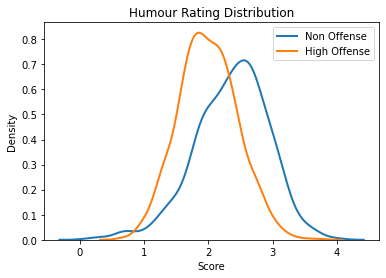

In [19]:
lista = ['low_offense1', 'high_offense']

for l in lista:
    
    if l == 'high_offense':
    
        sns.distplot(highOffense['humor_rating'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'High Offense')
    else:
        sns.distplot(lowOffense1['humor_rating'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'Non Offense')
    
plt.legend(prop={'size': 10})
plt.title('Humour Rating Distribution')
plt.xlabel('Score')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

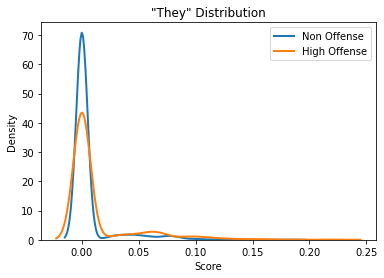

In [10]:
lista = ['low_offense1', 'high_offense']
for l in lista:
    
    if l == 'high_offense':
    
        sns.distplot(highOffense['PsicoLIWCthey'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'High Offense')
    else:
        sns.distplot(lowOffense1['PsicoLIWCthey'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'Non Offense')
    
plt.legend(prop={'size': 10})
plt.title('"They" Distribution')
plt.xlabel('Score')
plt.ylabel('Density')

In [6]:
lowOffense1['Hurtlex-moral-and-behavioral-defects'].min()

0.0

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

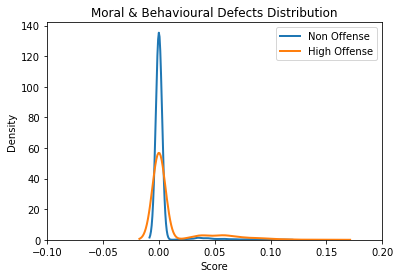

In [14]:
lista = ['low_offense1', 'high_offense']
fig,ax = plt.subplots()
for l in lista:
    
    if l == 'high_offense':
        
        sns.distplot(highOffense['Hurtlex-moral-and-behavioral-defects'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, ax=ax,
                 label = 'High Offense')
        ax.set_xlim(-0.1,0.2)
    else:
        sns.distplot(lowOffense1['Hurtlex-moral-and-behavioral-defects'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, ax=ax,
                 label = 'Non Offense')
        ax.set_xlim(-0.1,0.2)
    
plt.legend(prop={'size': 10})
plt.title('Moral & Behavioural Defects Distribution')
plt.xlabel('Score')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

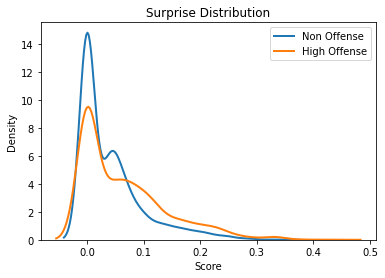

In [19]:
#surprise_frequency_EmoSenticNet
lista = ['low_offense1', 'high_offense']
for l in lista:
    
    if l == 'high_offense':
    
        sns.distplot(highOffense['surprise_frequency_EmoSenticNet'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'High Offense')
    else:
        sns.distplot(lowOffense1['surprise_frequency_EmoSenticNet'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'Non Offense')
    
plt.legend(prop={'size': 10})
plt.title('Surprise Distribution')
plt.xlabel('Score')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

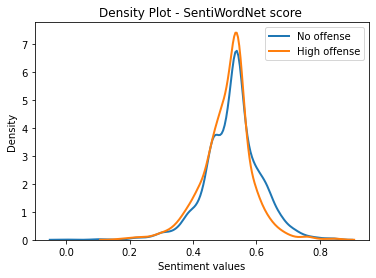

In [89]:
lista = ['No offense', 'High offense']
for l in lista:
    subset = total[total['offenseRatingTag'] == l]
    
    sns.distplot(subset['sentiwordnet_score_Normalized'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = l)
    
plt.legend(prop={'size': 10})
plt.title('Density Plot - SentiWordNet score ')
plt.xlabel('Sentiment values')
plt.ylabel('Density')

# Pruebas de hipótesis

## Sentimiento STANZA

In [16]:
chisquared(['sentimiento_stanza'],'Homogeneidad')

Rechazo Ho
{1.927458273501924e-20}


## Sentiwordnet score

In [17]:
l = ['sentiwordnet_score']
estadisticos(l)

& sentiwordnet_score  &  0.00214144067315016 & -0.1551 & 0.4256 & -0.2426 & 0.429 \\


## Textblob

In [18]:
chisquared(['tag_score_textblob'],'Homogeneidad')

Rechazo Ho
{1.4209817024003808e-05}


In [19]:
l = ['subjectivity_score_textblob','polarity_score_textblob']
estadisticos(l)

& subjectivity_score_textblob  &  4.835437824691811e-07 & 0.4114 & 0.0995 & 0.35 & 0.0811 \\
& polarity_score_textblob  &  1.3178992542791092e-07 & 0.0708 & 0.0758 & 0.0164 & 0.0621 \\


## VADER

In [20]:
chisquared(['vader_tag_sentiment'],'Homogeneidad')
print('---------------------------------------------------')
l = ['vader_score_sentiment']
estadisticos(l)

Rechazo Ho
{3.319279206255504e-09}
---------------------------------------------------
& vader_score_sentiment  &  1.2821882623055172e-11 & 0.0824 & 0.1908 & -0.0476 & 0.1801 \\


## AFINN

In [30]:
chisquared(['afinn_score_tag'],'Homogeneidad')
print('---------------------------------------------------')
l =  ['afinn_lexicon_score','afinn_score_Normalized']
estadisticos(l)

Rechazo Ho
{1.4779189788302311e-07}
---------------------------------------------------
& afinn_lexicon_score  &  4.985775144814066e-10 & 0.1947 & 2.2975 & -0.2778 & 2.865 \\
& afinn_score_Normalized  &  2.588893395007099e-11 & 0.6446 & 0.0041 & 0.6236 & 0.0049 \\


## ANEW

In [22]:
chisquared(['label_anew'],'Homogeneidad')
print('---------------------------------------------------')
l =  ['sentiment_anew','arousal_anew','dominance_anew']
estadisticos(l)

Rechazo Ho
{0.00027912431597699295}
---------------------------------------------------
& sentiment_anew  &  2.2907873460722523e-10 & 5.7582 & 0.2126 & 5.6276 & 0.243 \\
& arousal_anew  &  0.011503671162952976 & 4.0808 & 0.1116 & 4.1241 & 0.1504 \\
& dominance_anew  &  4.2377437259499385e-10 & 5.5608 & 0.0968 & 5.4778 & 0.1049 \\


## Lexicon-of-abusive-words

In [9]:
l =  ['abusive_scores','abusive_scores_binary']
estadisticos(l)

& abusive_scores  &  0.0036787973190385986 & -0.4839861293328095 & 0.7382014172947434 & -0.39293945740454905 & 0.9936446705424422 \\
& abusive_scores_binary  &  6.136476195405283e-08 & 0.00034540753858935676 & 1.7472138355444114e-05 & 0.002397856394827143 & 0.00016173292882793765 \\


## Emosenticnet

In [31]:
emo = ['anger_frequency_EmoSenticNet','disgust_frequency_EmoSenticNet',
       'fear_frequency_EmoSenticNet', 'joy_frequency_EmoSenticNet',
       'sad_frequency_EmoSenticNet','surprise_frequency_EmoSenticNet']
estadisticos(emo)

& disgust_frequency_EmoSenticNet  &  0.0003689934564300305 & 0.0093 & 0.0006 & 0.0136 & 0.0009 \\
& surprise_frequency_EmoSenticNet  &  2.1395374834346425e-13 & 0.0409 & 0.0032 & 0.0639 & 0.0057 \\


## SentiSense

In [25]:
senti = ['anger_frequency_SentiSense','anticipation_frequency_SentiSense','disgust_frequency_SentiSense',
'fear_frequency_SentiSense','joy_frequency_SentiSense','like_frequency_SentiSense',
'love_frequency_SentiSense','sadness_frequency_SentiSense','surprise_frequency_SentiSense']
estadisticos(senti)

& anger_frequency_SentiSense  &  0.0014307006455697544 & 0.0017 & 0.0001 & 0.0009 & 0.0001 \\
& anticipation_frequency_SentiSense  &  0.02902316934299804 & 0.0133 & 0.0007 & 0.0119 & 0.0007 \\
& disgust_frequency_SentiSense  &  0.0003034009928447165 & 0.03 & 0.002 & 0.0366 & 0.0022 \\
& fear_frequency_SentiSense  &  2.3183167833472853e-11 & 0.0078 & 0.0005 & 0.015 & 0.001 \\
& joy_frequency_SentiSense  &  0.018304122784326346 & 0.0058 & 0.0003 & 0.0094 & 0.0006 \\
& like_frequency_SentiSense  &  0.01875967969306678 & 0.0276 & 0.0016 & 0.0244 & 0.0015 \\
& love_frequency_SentiSense  &  0.027443866353957867 & 0.0061 & 0.0003 & 0.0044 & 0.0003 \\
& sadness_frequency_SentiSense  &  0.010813131484723928 & 0.0033 & 0.0002 & 0.0053 & 0.0004 \\


## Tipology of groups & social categories

In [32]:
lista = [
'national_groups',
 'Ethinc'
]
estadisticos(lista)

& national_groups  &  2.584947541761809e-17 & 0.0 & 0.0 & 0.0043 & 0.0003 \\
& Ethinc  &  3.5410816269476765e-12 & 0.0 & 0.0 & 0.0033 & 0.0002 \\


/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


## POS features

In [6]:
lista = ['noun_frequency','pronoun_frequency','adverbs_frequency','adjective_frequency',
 'punctuation_symbols_stanza_tagger','primera_plural_stanza',#'segunda_plural_stanza',
 'tercera_plural_stanza','primera_singular_stanza','segunda_singular_stanza',
 'tercera_singular_stanza']
estadisticos(lista)

& noun_frequency  &  8.875598810073483e-05 & 0.2511372860974594 & 0.008813347527895211 & 0.2378884710721612 & 0.009209216850655271 \\
& adverbs_frequency  &  2.9166047731409176e-05 & 0.05660112073099019 & 0.0033043173105318344 & 0.04797727327279182 & 0.003097104875326266 \\
& adjective_frequency  &  1.8785516281713836e-07 & 0.08157189508148853 & 0.00400774205976584 & 0.09677186938880131 & 0.004867948563642507 \\
& primera_plural_stanza  &  3.256548806482815e-06 & 0.0033000461361106528 & 0.00022826260731589418 & 0.0011537257403011058 & 7.03708886575986e-05 \\
& primera_singular_stanza  &  1.7272325323476064e-33 & 0.03825429861361919 & 0.0022913750243527217 & 0.01826494139965834 & 0.00125037729431688 \\
& segunda_singular_stanza  &  0.004917060195929793 & 0.0012900504372896327 & 8.996862462998255e-05 & 0.00046511365780293443 & 2.9139168737741756e-05 \\
& tercera_singular_stanza  &  0.0046691773731056966 & 0.012256812511683292 & 0.0006984041392545347 & 0.009992615183219864 & 0.00061125047

## Hurtlex

In [7]:
lista =['Hurtlex-negative-stereotypes-ethnic-slurs',
 'Hurtlex-moral-and-behavioral-defects',
 'Hurtlex-derogatory-words',
 'Hurtlex-word-seven-deadly-sins-of-the-Christian-tradition',
       'Hurtlex-felonies-crime-immoral-behavior']
estadisticos(lista)

& Hurtlex-negative-stereotypes-ethnic-slurs  &  8.643150966726051e-40 & 0.0003682998041603863 & 2.204103685497545e-05 & 0.010536183036106143 & 0.0007549653410883439 \\
& Hurtlex-moral-and-behavioral-defects  &  2.565258494530201e-23 & 0.0023240120854267922 & 0.00013532691001888814 & 0.009967446770470846 & 0.0005800150132604875 \\
& Hurtlex-felonies-crime-immoral-behavior  &  0.023517184875174475 & 0.002778107905748144 & 0.00015610129366158034 & 0.003913915091763753 & 0.0002640395764640406 \\


## LIWC

In [8]:
cols = []
d=list(df.columns)
for i in range(len(d)):
    if d[i].startswith('PsicoLIWC'):
        cols.append(d[i])
    else:
        i+=1
estadisticos(cols)

& PsicoLIWCachieve  &  0.0023460315815392666 & 0.017699587725780928 & 0.0010935299499545957 & 0.014171222130951257 & 0.000885700389838002 \\
& PsicoLIWCadverb  &  0.030189262946072236 & 0.042565913166757244 & 0.002282074562043857 & 0.03866464114943488 & 0.0021506672213290915 \\
& PsicoLIWCaffect  &  0.0002764548443628592 & 0.05830304840519641 & 0.003966954012204409 & 0.04869121195448899 & 0.0030647339975875473 \\
& PsicoLIWCanger  &  0.0016788530179369945 & 0.008682101708467543 & 0.0005322636411725539 & 0.012719441065411417 & 0.0008825471184494448 \\
& PsicoLIWCanx  &  0.00016535853539984498 & 0.003915163917027584 & 0.00022062312849207004 & 0.002718991676399826 & 0.00020209739020289624 \\
& PsicoLIWCarticle  &  9.584671357563612e-10 & 0.07479246041134548 & 0.00379027134892546 & 0.09153833554150699 & 0.004682826237363976 \\
& PsicoLIWCauxverb  &  2.6693368523463427e-06 & 0.09020366530089877 & 0.0030371485899626433 & 0.1006938715692645 & 0.003096838681233178 \\
& PsicoLIWCbio  &  1.08975

## Correlación entre humor_rating y offense_rating

In [10]:
df2=df.dropna() 

In [11]:
a1 = np.array(df2["humor_rating"])
a2 = np.array(df2["offense_rating"])
stats.spearmanr(a1,a2)

SpearmanrResult(correlation=-0.2714343055200304, pvalue=4.905072691411169e-84)

In [31]:
a1 = np.array(highOffense["vader_score_sentiment"])
a2 = np.array(highOffense["offense_rating"])
stats.spearmanr(a1,a2)

SpearmanrResult(correlation=-0.017894908355006796, pvalue=0.6897659045345582)

### Features from taggers for EDA 

In [17]:
scoresFeats = ['polaridad_media_sentic',
               'sentiwordnet_score_Normalized',
               'afinn_lexicon_score','afinn_score_Normalized',
               'vader_score_sentiment','polarity_score_textblob','subjectivity_score_textblob',
               'sentiment_anew','arousal_anew','dominance_anew','abusive_scores_Normalized']

estadisticos(scoresFeats)

& sentiwordnet_score_Normalized  &  0.00214144067315016 & 0.5188 & 0.0061 & 0.5084 & 0.0061 \\
& afinn_lexicon_score  &  4.985775144814066e-10 & 0.1947 & 2.2975 & -0.2778 & 2.865 \\
& afinn_score_Normalized  &  2.588893395007099e-11 & 0.6446 & 0.0041 & 0.6236 & 0.0049 \\
& vader_score_sentiment  &  1.2821882623055172e-11 & 0.0824 & 0.1908 & -0.0476 & 0.1801 \\
& polarity_score_textblob  &  1.3178992542791092e-07 & 0.0708 & 0.0758 & 0.0164 & 0.0621 \\
& subjectivity_score_textblob  &  4.835437824691811e-07 & 0.4114 & 0.0995 & 0.35 & 0.0811 \\
& sentiment_anew  &  2.2907873460722523e-10 & 5.7582 & 0.2126 & 5.6276 & 0.243 \\
& arousal_anew  &  0.011503671162952976 & 4.0808 & 0.1116 & 4.1241 & 0.1504 \\
& dominance_anew  &  4.2377437259499385e-10 & 5.5608 & 0.0968 & 5.4778 & 0.1049 \\
& abusive_scores_Normalized  &  0.0036787973190385986 & 0.4715 & 0.013 & 0.4836 & 0.0175 \\


In [14]:
listaFeats = ['sentimiento_stanza']
chisquared(listaFeats,'Homogeneidad')

Rechazo Ho
{1.927458273501924e-20}


##### Plots

In [12]:
humor_features = t[['PsicoLIWCachieve',
'PsicoLIWCanger',
'PsicoLIWCanx',
'PsicoLIWCarticle',
'PsicoLIWCauxverb',
'PsicoLIWCbio',
'PsicoLIWCbody',
'PsicoLIWCcause',
'PsicoLIWCdiscrep',
'PsicoLIWCexcl',
'PsicoLIWCfriend',
'PsicoLIWChome',
'PsicoLIWChumans',
'PsicoLIWCi',
'PsicoLIWCinhib',
'PsicoLIWCinsight',
'PsicoLIWCleisure',
'PsicoLIWCposemo',
'PsicoLIWCppron',
'PsicoLIWCpreps',
'PsicoLIWCpresent',
'PsicoLIWCpronoun',
'PsicoLIWCquant',
'PsicoLIWCrelativ',
'PsicoLIWCrelig',
'PsicoLIWCsee',
'PsicoLIWCsexual',
'PsicoLIWCsocial',
'PsicoLIWCspace',
'PsicoLIWCswear',
'PsicoLIWCthey',
'PsicoLIWCverb',
'sentiwordnet_score',
'subjectivity_score_textblob',
'vader_score_sentiment',
'afinn_score_Normalized', 'afinn_lexicon_score','abusive_scores','abusive_scores_binary',
'anger_frequency_EmoSenticNet','surprise_frequency_EmoSenticNet','disgust_frequency_EmoSenticNet',
 'disgust_frequency_SentiSense', 'fear_frequency_SentiSense','like_frequency_SentiSense','sadness_frequency_SentiSense',
'national_groups', 'Ethinc','noun_frequency','pronoun_frequency','adjective_frequency','adverbs_frequency',
'punctuation_symbols_stanza_tagger','primera_singular_stanza','segunda_singular_stanza','tercera_singular_stanza',                 
'Hurtlex-negative-stereotypes-ethnic-slurs','Hurtlex-moral-and-behavioral-defects'
        ]]

In [13]:
import numpy as np
corr = humor_features.corr(method='spearman')
np.fill_diagonal(corr.values, np.nan)
#print(corr)
order_top2 = np.argsort(-corr.values, axis=1)[:, :2]
order_bottom = np.argsort(corr.values, axis=1)[:, :1]

result_top2 = pd.DataFrame(
    corr.columns[order_top2], 
    columns=['1st', '2nd'],
    index=corr.index
)

result_bottom = pd.DataFrame(
    corr.columns[order_bottom], 
    columns=['Last'],
    index=corr.index
)

result = result_top2.join(result_bottom)
for x in result.columns:
    result[x+"_Val"] = corr.lookup(corr.index, result[x])
#result

<ipython-input-13-6b61061220b3>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  corr.columns[order_top2],
<ipython-input-13-6b61061220b3>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  corr.columns[order_bottom],


In [67]:
#result.to_excel('/Users/luciainesmerlo/Desktop/TFG/HaHackaton2020/correlaciones.xlsx')

<AxesSubplot:>

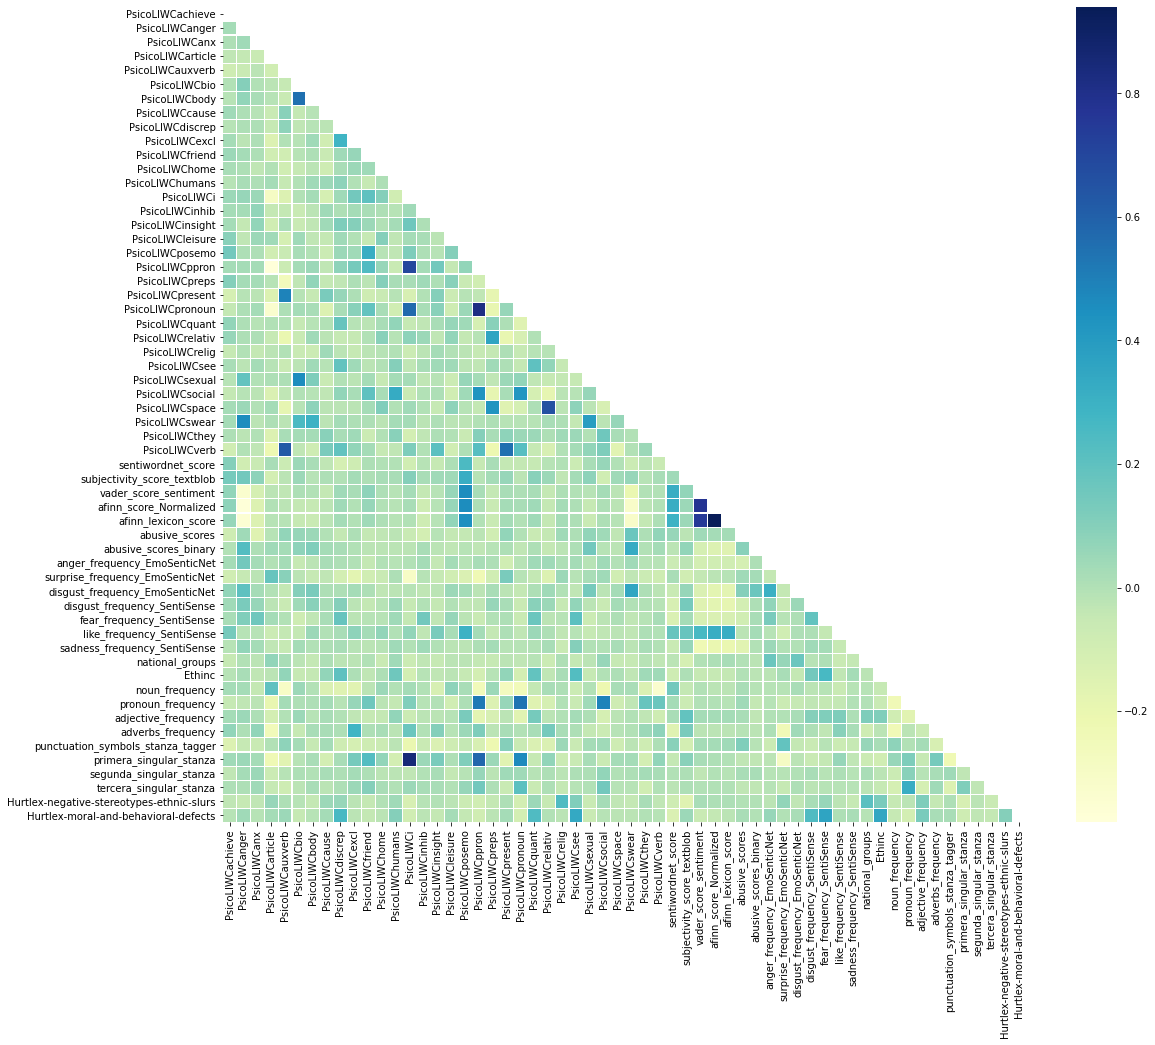

In [53]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize =(18, 15))
sns.heatmap(corr, annot=False, mask=mask,
            ax = ax, cmap ="YlGnBu", linewidths = 0.1
           # ,annot_kws={'stretch':'condensed','rotation':'horizontal'}
           )

In [48]:
d = pd.melt(df,id_vars=['text'],value_vars=['PsicoLIWCppron', 'PsicoLIWCaffect','PsicoLIWCcogmech'])
d.head()

,text,variable,value
0,TENNESSEE: We're the best state. Nobody even c...,PsicoLIWCppron,0.055556
1,A man inserted an advertisement in the classif...,PsicoLIWCppron,0.129032
2,How many men does it take to open a can of bee...,PsicoLIWCppron,0.038462
3,Told my mom I hit 1200 Twitter followers. She ...,PsicoLIWCppron,0.192308
4,Roses are dead. Love is fake. Weddings are bas...,PsicoLIWCppron,0.000000


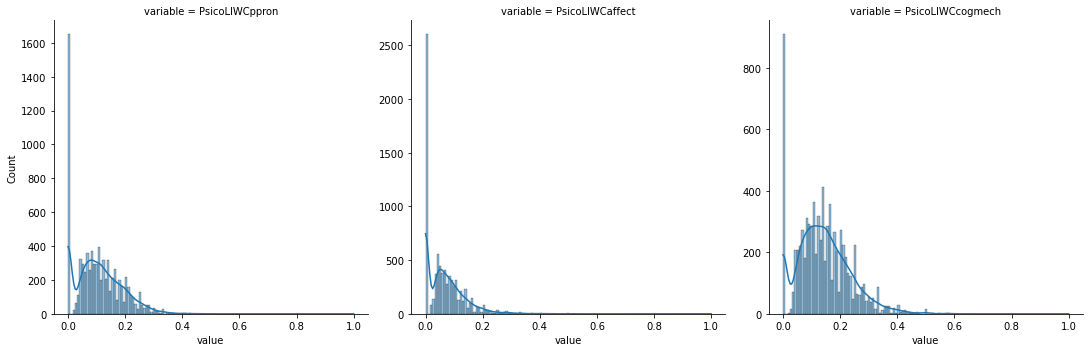

In [61]:
#fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
#g = sns.FacetGrid(d, col='variable')
#g = (g.map(sns.displot, "value", kde=True))
sns.displot(data=d, col='variable', col_wrap=10, 
            x='value', kde=True, facet_kws={'sharey': False, 'sharex': False})

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

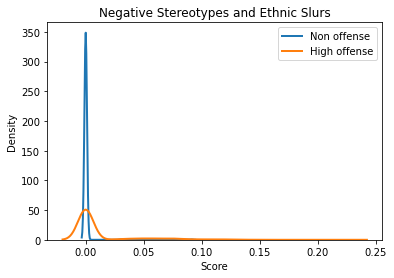

In [15]:
lista = ['low_offense1', 'high_offense']

for l in lista:
    subset = t[t['tag'] == l]
    if l == 'low_offense1':
        sns.distplot(subset['Hurtlex-negative-stereotypes-ethnic-slurs'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'Non offense')
    else:
        sns.distplot(subset['Hurtlex-negative-stereotypes-ethnic-slurs'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'High offense')
    
plt.legend(prop={'size': 10})
plt.title('Negative Stereotypes and Ethnic Slurs')
plt.xlabel('Score')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

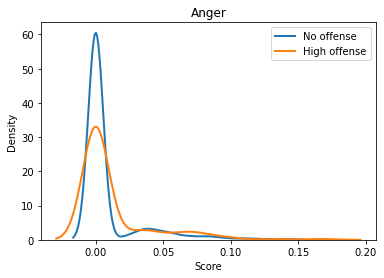

In [37]:
lista = [1,4]

for l in lista:
    subset = t[t['offenseRatingTag'] == l]
    if l == 1:
        sns.distplot(subset['PsicoLIWCanger'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'No offense')
    else:
        sns.distplot(subset['PsicoLIWCanger'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'High offense')
    
plt.legend(prop={'size': 10})
plt.title('Anger')
plt.xlabel('Score')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

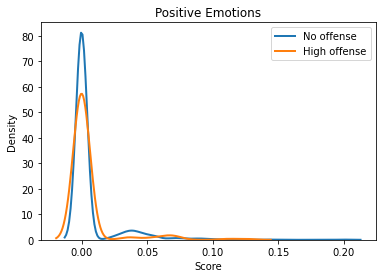

In [40]:
lista = [1,4]

for l in lista:
    subset = t[t['offenseRatingTag'] == l]
    if l == 1:
        sns.distplot(subset['joy_frequency_SentiSense'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'No offense')
    else:
        sns.distplot(subset['joy_frequency_SentiSense'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'High offense')
    
plt.legend(prop={'size': 10})
plt.title('Positive Emotions')
plt.xlabel('Score')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

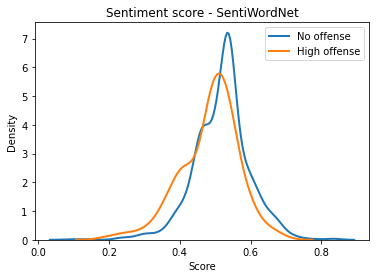

In [57]:
lista = [1,4] #sentiment_anew_Normalized

for l in lista:
    subset = t[t['offenseRatingTag'] == l]
    if l == 1:
        sns.distplot(subset['sentiwordnet_score_Normalized'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'No offense')
    else:
        sns.distplot(subset['sentiwordnet_score_Normalized'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'High offense')
    
plt.legend(prop={'size': 10})
plt.title('Sentiment score - SentiWordNet')
plt.xlabel('Score')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

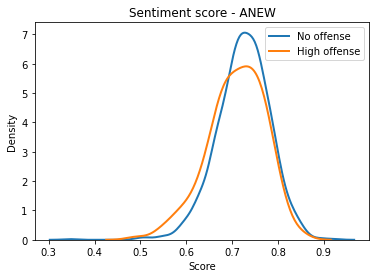

In [56]:
lista = [1,4] #sentiment_anew_Normalized

for l in lista:
    subset = t[t['offenseRatingTag'] == l]
    if l == 1:
        sns.distplot(subset['sentiment_anew_Normalized'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'No offense')
    else:
        sns.distplot(subset['sentiment_anew_Normalized'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'High offense')
    
plt.legend(prop={'size': 10})
plt.title('Sentiment score - ANEW')
plt.xlabel('Score')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

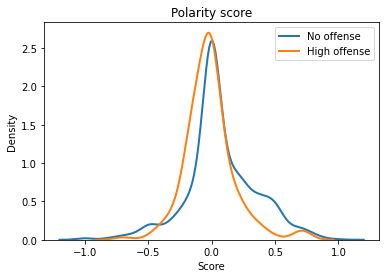

In [44]:
lista = [1,4] #polarity_score_textblob

for l in lista:
    subset = t[t['offenseRatingTag'] == l]
    if l == 1:
        sns.distplot(subset['polarity_score_textblob'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'No offense')
    else:
        sns.distplot(subset['polarity_score_textblob'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'High offense')
    
plt.legend(prop={'size': 10})
plt.title('Polarity score')
plt.xlabel('Score')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

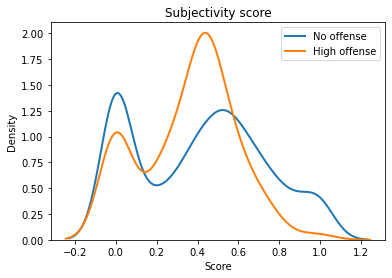

In [52]:
lista = [1,4] #polarity_score_textblob

for l in lista:
    subset = t[t['offenseRatingTag'] == l]
    if l == 1:
        sns.distplot(subset['subjectivity_score_textblob'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'No offense')
    else:
        sns.distplot(subset['subjectivity_score_textblob'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'High offense')
    
plt.legend(prop={'size': 10})
plt.title('Subjectivity score')
plt.xlabel('Score')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

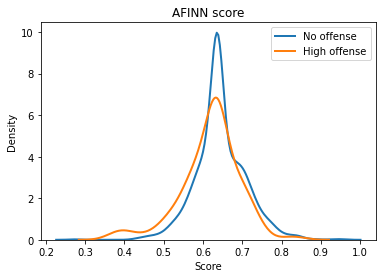

In [48]:
lista = [1,4] #polarity_score_textblob

for l in lista:
    subset = t[t['offenseRatingTag'] == l]
    if l == 1:
        sns.distplot(subset['afinn_score_Normalized'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'No offense')
    else:
        sns.distplot(subset['afinn_score_Normalized'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'High offense')
    
plt.legend(prop={'size': 10})
plt.title('AFINN score')
plt.xlabel('Score')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

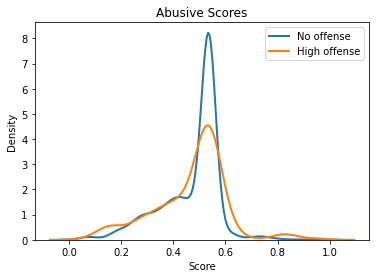

In [55]:
lista = [1,4] #vader_score_sentiment_Normalized

for l in lista:
    subset = t[t['offenseRatingTag'] == l]
    if l == 1:
        sns.distplot(subset['abusive_scores_Normalized'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'No offense')
    else:
        sns.distplot(subset['abusive_scores_Normalized'], hist = False, kde = True,
                kde_kws = {'linewidth': 2},
                 label = 'High offense')
    
plt.legend(prop={'size': 10})
plt.title('Abusive Scores')
plt.xlabel('Score')
plt.ylabel('Density')

### Ejemplos

In [23]:
t.loc[(t['offense_rating']>4)&(t['humor_rating']>2.5)]['text'][1897]

"What's the difference between a Mexican and a bench? The bench can support a family of four."

In [42]:
t['text'][6500]

'I like my slaves like I like my coffee Strong and black'

In [46]:
t['text'][3367]

"If you're having a bad day, just punch an orphan. Who are they going to tell? Their parents?"

In [51]:
t['text'][1897]

"What's the difference between a Mexican and a bench? The bench can support a family of four."

In [28]:
t['text'][1295]

'What is a Cell? something you keep black people in'

In [34]:
df['text'][5090]

"I have a solution to 99% of the racism, homophobia and gender issues in the world.. Let's just kill all the self righteous liberal leftie woke snowflakes. Then we can rationaly deal with injustice, get on with our lives, and all mind our own fucking business."

### Funciones

In [13]:
def chisquared(lista, method):
   # dic = {}
    if method == 'Homogeneidad':
        variable = t['tag']
        for i in lista:
    
            crosstab = pd.crosstab(variable,t[i])
            chi2, pvalue, dof, expected = stats.chi2_contingency(crosstab)
            
            if pvalue<0.05:
                print('Rechazo Ho')
                #if type(i) is int or i in ('0','1','2'):
                    #print({pvalue},'&',round(h[i].mean(),2),'&', round(h[i].var(),2),'&',
                    #  round(nh[i].mean(),2),'&',round(nh[i].var(),2),'\\\\') 
                    
                #else:
                print({pvalue})
            else:
                print('no significativo')

In [5]:
def estadisticos(lista, input_ = None):
    
        
    dic = {}
    alpha = 0.05
    for i in lista:
        
        a1 = np.array(lowOffense1.loc[:,i])
        a2 = np.array(highOffense.loc[:,i])
        corr, pvalue = stats.spearmanr(a1,a2) #veo si las muestras están pareadas
        
        if pvalue > alpha:
            try:
                mannwhitney = mwu(lowOffense1[i], highOffense[i])
                if (mannwhitney['p-val'] < 0.05).all():
                    
                    print('&', i ,' & ', mannwhitney['p-val'].values[0],'&',
                      lowOffense1[i].mean(),'&', lowOffense1[i].var(),'&',
                      highOffense[i].mean(),'&',highOffense[i].var(),'\\\\')
            
            except ValueError:
                i += 1
                
        else:
            try:
                wilcoxon = pg.wilcoxon(lowOffense1[i], highOffense[i])
                if (wilcoxon['p-val'] < 0.05).all():
                    
                    print('&', i ,' & ', wilcoxon['p-val'].values[0],'&',
                      lowOffense1[i].mean(),'&', lowOffense1[i].var(),'&',
                      highOffense[i].mean(),'&',highOffense[i].var(),'\\\\')
            except ValueError:
                i += 1
                

In [8]:
def names(lista):
    alpha = 0.05
    for i in lista:
        
        a1 = np.array(lowOffense1.loc[:,i])
        a2 = np.array(highOffense.loc[:,i])
        corr, pvalue = stats.spearmanr(a1,a2) #veo si las muestras están pareadas
        
        if pvalue > alpha:
            try:
                mannwhitney = mwu(lowOffense1[i], highOffense[i])
                if (mannwhitney['p-val'] < 0.05).all():
                    
                    print(i)
            
            except ValueError:
                i += 1
                
        else:
            try:
                wilcoxon = pg.wilcoxon(lowOffense1[i], highOffense[i])
                if (wilcoxon['p-val'] < 0.05).all():
                    print(i)
                    
            except ValueError:
                i += 1